✅ Clustering Accuracy (after label mapping): 0.5312


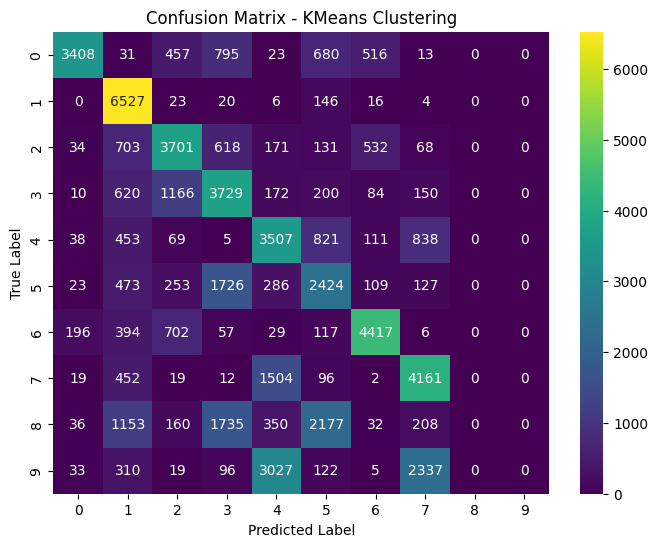

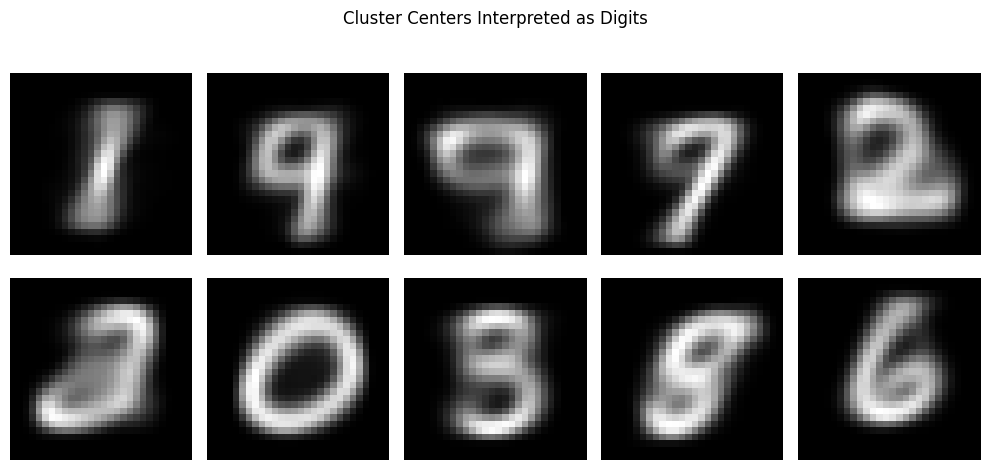

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
import seaborn as sns
import idx2numpy

# 1. Load MNIST dataset
train_images = idx2numpy.convert_from_file(r'MNIST\train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file(r'MNIST\train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file(r'MNIST\t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file(r'MNIST\t10k-labels.idx1-ubyte')

# 2. Flatten and normalize the images (scale pixel values between 0 and 1)
train_images = train_images.reshape(-1, 28*28) / 255.0
test_images = test_images.reshape(-1, 28*28) / 255.0

# 3. Set features (X) and labels (y) for training
X = train_images  # Input data (flattened images)
y = train_labels  # Labels (digits 0-9)

# 4. Normalize the features (standardize)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Apply K-Means clustering (10 clusters for digits 0-9)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 6. Map each cluster to the most frequent true label
predicted_labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    if np.any(mask):
        predicted_labels[mask] = mode(y[mask], keepdims=False)[0]

# 7. Calculate and print accuracy
accuracy = accuracy_score(y, predicted_labels)
print(f"✅ Clustering Accuracy (after label mapping): {accuracy:.4f}")

# 8. Plot confusion matrix to see performance
cm = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - KMeans Clustering")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 9. Visualize the cluster centers as digits (reshape to 28x28)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Reverse scaling
for ax, center in zip(axes.flat, centers):
    ax.imshow(center.reshape(28, 28), cmap='gray')  # Reshape centers back to 28x28 image
    ax.axis('off')
plt.suptitle("Cluster Centers Interpreted as Digits")
plt.tight_layout()
plt.show()
